# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

### Скачиваем датасет

In [1]:
! pip3 install wldhx.yadisk-direct # Библа, чтобы получать прямые ссылки с я.диска

In [2]:
! curl -L $(yadisk-direct https://yadi.sk/d/BNR41Vu3y0c7qA) -o dataset.zip
! unzip dataset.zip > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  210M  100  210M    0     0  18.1M      0  0:00:11  0:00:11 --:--:-- 23.7M


### Задания

In [3]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
# You may add any imports you need
import glob
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose
from torch.utils.data import DataLoader
from IPython.display import clear_output
import PIL

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        # YOUR CODE
        self.dataset = ImageFolder(root=data_dir, transform=transform)
    def __getitem__(self, idx):
        # YOUR CODE
        return self.dataset[idx]
    def __len__(self, idx=None): # idx??
        # YOUR CODE
        return len(self.dataset)

./dataset/dataset/train/class_184/00190.jpg


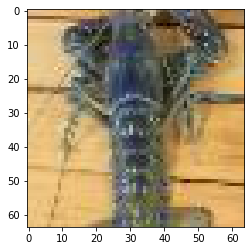

In [4]:
# Посмотрим на изображения
file = np.random.choice(glob.glob("./dataset/dataset/train/*/*.jpg"))
print(file)
plt.imshow(plt.imread(file))
plt.show()

In [5]:
train_transform = Compose([
    # torchvision.transforms.RandomHorizontalFlip(), # С вероятностью 0.5 отражаем по горизонтали
    # torchvision.transforms.RandomRotation(25, resample=PIL.Image.BILINEAR), # Случайный поворот до 25 градусов
    # torchvision.transforms.RandomCrop((60,60)), # Случайным образом выбираем область 60x60
    torchvision.transforms.Resize((64,64)), # Обратно масштабируем в разрешение 64x64
    # torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, hue=0.05, saturation=0.1), # Слегка меняем цвет изображения
    torchvision.transforms.ToTensor(), # Превращаем в тенсор
    Normalize((0.5, 0.5, 0.5), (1, 1, 1)), # Нормализуем каждый канал со средним 0.5 и стандартным отклонением 1
])

val_transform = Compose([
                         Resize((64, 64)),
                         ToTensor(),
                         Normalize((0.5, 0.5, 0.5), (1, 1, 1)),
                         ])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = MyDataset("./dataset/dataset/train", transform=train_transform)
val_dataset = MyDataset("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [6]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [7]:
def plot_metrics(losses, accuracies):

    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    x_axis = np.arange(len(losses))

    # График ошибки
    ax[0].plot(x_axis, losses)
    ax[0].set_title('Зависимость ошибки от числа итераций')
    ax[0].set_xlabel('Количество итераций')
    ax[0].set_ylabel('Ошибка')

    # График точности предсказания
    ax[1].plot(x_axis, accuracies)
    ax[1].set_title('Зависимость доли верных ответов от числа итераций')
    ax[1].set_xlabel('Количество итераций')
    ax[1].set_ylabel('Доля верных предсказаний')

    plt.show()

In [15]:
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model.to(device).train()
    # YOUR CODE
    losses = []
    accuracies = []
    with tqdm(total=len(train_dataloader)) as pbar:
        for batch in train_dataloader:
            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Метрики
            _, predicted = torch.max(outputs.detach(), 1)
            accuracy = accuracy_score(predicted.cpu(),
                                      labels.cpu())
            losses.append(loss.item())
            accuracies.append(accuracy)

            # Прогресс
            pbar.set_description('Loss: {:.4f}; Accuracy: {:.4f}%'.format(loss.item(),
                                                                         100*accuracy))
            pbar.update(1)
    
    return losses, accuracies
    # TRAIN YOUR MODEL HERE

def predict(model, val_dataloader, criterion, device="cuda:0"):
    model.to(device).eval()
    # YOUR CODE
    # predict val_dataloader and print and return the validation accuracy
    # pass
    losses = []
    predicted_classes = []
    true_classes = []
    with tqdm(total=len(val_dataloader)) as pbar:
        with torch.no_grad():
            for batch in val_dataloader:
                imgs, labels = batch
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                # Сохраняем результаты
                losses.append(loss.item())
                _, predicted = torch.max(outputs, 1)
                predicted_classes.append(predicted)
                true_classes.append(labels)
                accuracy = accuracy_score(predicted.cpu(),
                                          labels.cpu())

                # Прогресс
                pbar.set_description('Loss: {:.4f}; Accuracy: {:.4f}%'.format(loss.item(),
                                                                              100*accuracy))
                pbar.update(1)

    predicted_classes = torch.cat(predicted_classes).detach().to('cpu').numpy()
    true_classes = torch.cat(true_classes).detach().to('cpu').numpy()
    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    # Для сохранения метрик
    all_losses = []
    all_accuracies = []
    for epoch in range(n_epochs):
        # YOUR CODE
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        print('Epoch:', epoch)
        losses, accuracies = train_one_epoch(model, train_dataloader, criterion, optimizer)
        all_losses.append(losses)
        all_accuracies.append(accuracies)
        # График
        clear_output(wait=True)
        plot_metrics(np.array(all_losses).reshape(-1), np.array(all_accuracies).reshape(-1))
        # Валидация
        print('Validation')
        losses, predicted_classes, true_classes = predict(model, val_dataloader, criterion)
        accuracy = accuracy_score(predicted_classes, true_classes)
        print('Validation accuracy:', accuracy)
        # Менять lr
        if scheduler:
            scheduler.step(accuracy)        

In [9]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        def block(in_channels, out_channels, downsample=True):
            layers = [nn.Conv2d(in_channels, out_channels, [3, 3], stride=1, padding=[1, 1])]
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            layers.append(nn.Conv2d(out_channels, out_channels, [3, 3], stride=1, padding=[1, 1]))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            if downsample:
                layers.append(nn.AvgPool2d(2, 2))
            return layers

        # Блочная модель
        self.model = nn.Sequential(
            *block(3, 32), # output shape (None, 32, 32, 32)
            nn.Dropout(0.2),
            *block(32, 64), # output shape (None, 64, 16, 16)
            nn.Dropout(0.2),
            *block(64, 128), # output shape (None, 128, 8, 8)
            nn.Dropout(0.2),
            *block(128, 256), # output shape (None, 256, 4, 4)
            nn.Dropout(0.2),
            *block(256, 256), # output shape (None, 256, 2, 2)
            nn.Dropout(0.2),
            *block(256, 256), # output shape (None, 256, 1, 1)
            nn.Dropout(0.2),
            nn.Flatten(),
            nn.Linear(256*1*1, 200)
        )

        # модель поменьше для экспериментов
        self.model2 = nn.Sequential(
            # input_shape = (None, 3, 64, 64)
            nn.Conv2d(3, 32, kernel_size=[3, 3], padding=[1, 1]),
            nn.LeakyReLU(0.2),
            nn.AvgPool2d(2, 2), 
            # output_shape = (None, 32, 32, 32)
            nn.Conv2d(32, 64, kernel_size=[3, 3], padding=[1, 1]),
            nn.LeakyReLU(0.2),
            nn.AvgPool2d(2, 2), 
            # output_shape = (None, 64, 16, 16)
            nn.Conv2d(64, 128, kernel_size=[3, 3], padding=[1, 1]),
            nn.LeakyReLU(0.2),
            # output_shape = (None, 128, 16, 16)
            nn.Flatten(),
            nn.Linear(128*16*16, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 200)
            # output_shape = (None, 200)
        )

    def forward(self, imgs):
        pred = self.model(imgs) # Будем использовать блочную модель
        return pred

In [10]:
model = MyModel() # THE MODEL THAT YOU CHOOSE
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005) # YOUR OPTIMIZER
train_dataloader = DataLoader(
                              train_dataset, batch_size=64, shuffle=True, num_workers=1
                              ) # TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = DataLoader(
                            val_dataset, batch_size=64, num_workers=1
                            ) # VAL DATALOADER WHICH YOU CONSTRUCT
criterion = nn.CrossEntropyLoss() # LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None # LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 25 # NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")


tests passed


Запустить обучение можно в ячейке ниже.

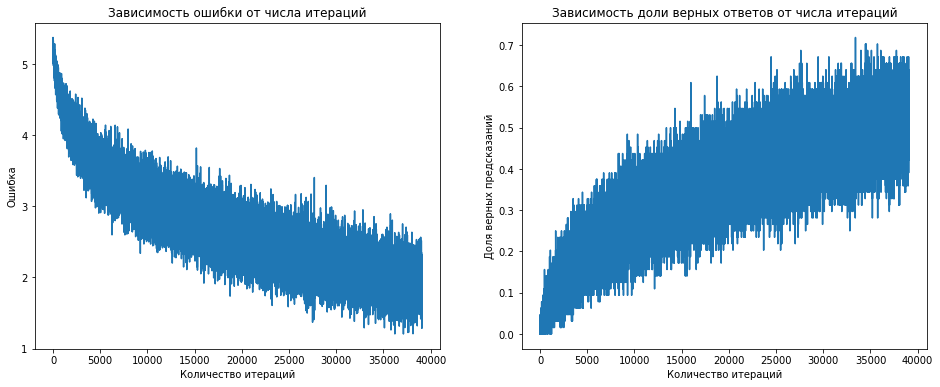

Validation



Validation accuracy: 0.4535


In [ ]:
# Поехали. Сходимся на 5-ку за 25 эпох
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

In [ ]:
# Сохранить модель
torch.save({'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          }, 'model.pth')

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
# Загрузка чекпойнта
checkpoint = torch.load('model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model.eval()

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))


Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: текст писать тут

Сначала решил обучить блочную модель без дропаута и аугументаций. За 20 эпох она начала переобучаться. Решил добавить дропаут и все сошлось за 25 эпох.

Идея самой модели простая - маленькие фильтры [3, 3] в свертках (например, такие использовали NVIDIA, чтобы красивые лица генерировать [https://arxiv.org/abs/1912.04958]) и 'same' паддинг, батч нормы и LeakyReLU. На каждом следующем слое сжимаем картинку в 2 раза и увеличиваем количество каналов в 2 раза. 

В бонусном задании решил добавить аугументаций, они более чем в 2 раза замедляют обучение. С 45% правильных ответов на тесте удалось увеличить качество до 49%. 

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

### Скачаем датасет

In [ ]:
! pip3 install wldhx.yadisk-direct
! pip3 install --upgrade albumentations # Обновим, а то ошибки какие-то
# Пайторч тоже обновим, а то: CUDA error: device-side assert triggered
# ! pip install torch===1.7.0+cu110 torchvision===0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 36.7MB 86kB/s 
     |████████████████████████████████| 952kB 44.9MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
! curl -L $(yadisk-direct https://yadi.sk/d/UPwQB7OZrB48qQ) -o DetectionDataset.zip
! unzip DetectionDataset.zip > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 28.3M  100 28.3M    0     0  5150k      0  0:00:05  0:00:05 --:--:-- 7814k


### Задания

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
# we will need this library to process the labeling
! pip install xmltodict

In [ ]:
import xmltodict, json

Датасет мы за вас написали.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
from tqdm.notebook import tqdm
from IPython.display import clear_output
from torchvision.ops import batched_nms

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [ ]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            # + Non max supression [batched_nms(t['boxes'], t['scores'], t['labels'], 0.3)]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]
            
            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [ ]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader

    # Позаимствуем немного кода с семинаров
    model.to(device).train()
    n = 0
    global_loss = 0
    with tqdm(total=len(train_dataloader)) as pbar:
        for images, targets in train_dataloader:
            images = list(image.to(device).float() for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            dict_loss = model(images, targets)
            losses = sum(loss for loss in dict_loss.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

            n += 1
            global_loss += float(losses.cpu().detach().numpy())
            
            # Выведем ошибку в прогресс-бар
            pbar.set_description("Loss value {:.4f}".format(global_loss / n))
            pbar.update(1)

    return global_loss


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        clear_output()
        model.to(device).eval()
        print('Validation:')
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {:.4f}".format(a))
        print('Epoch:', epoch)
        model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Будем обучать fasterrcnn как на семинаре
def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # посмотрим сколько классов выдает
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # заменим последний слой на подходящий для нашей задачи
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

model = get_detection_model() # YOUR CODE, CREATE MODEL FOR OBJECT DETECTION
# HINT: USE MATERIALS FROM THE SEMINAR
# YOU CAN USE torchvision.models AND torchvision.models.detection
# READ OFFICIAL DOCS FOR MORE INFO

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [ ]:
train_transform = A.Compose([
                             # A.Resize(256, 256),
                             A.HorizontalFlip(), # Отразить по горизонтали
                             # A.RandomSizedBBoxSafeCrop(500, 640, p=.1), # Взять область 500 на 640 безопасно для боксов
                             A.Rotate(limit=90, border_mode=cv2.BORDER_REPLICATE, p=.05), # Случайно повернуть до 90 градусов
                             A.RandomBrightnessContrast(0.2, 0.2, always_apply=True), # Яркость/контрастность
                             A.HueSaturationValue(8, 20, 10, True), # Цветастость/насыщенность 
                             A.RandomGamma(always_apply=True), # Гамма
                             A.GaussianBlur(5, p=.1), # Размытие
                             ToTensor(
                              # normalize={'mean': (0.814, 0.691, 0.539), 'std': (0.176, 0.234, 0.316)}
                              ) # Превратить в тенсор
                             ], A.BboxParams(format='pascal_voc', label_fields=[], )) # YOUR CODE FOR AUGMENTATIONS
val_transform = A.Compose([
                          # A.Resize(256, 256),
                          ToTensor(
                              # normalize={'mean': (0.814, 0.691, 0.539), 'std': (0.176, 0.234, 0.316)}
                              ) # Превратить в тенсор
                          ], A.BboxParams(format='pascal_voc', label_fields=[], )) # YOUR CODE FOR VALIDATION AUGMENTATIONS
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

params = [param for param in model.parameters() if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.00001) # SELECT YOUR OPTIMIZER
train_dataloader = DataLoader(
    train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=lambda batch: tuple(zip(*batch)),
) # CREATE YOUR DATALOADER, SELECT APPROPRIATE batch_size
val_dataloader = DataLoader(
    val_dataset, batch_size=2, num_workers=4, collate_fn=lambda batch: tuple(zip(*batch)),
) # CREATE VALIDATION DATALOADER
n_epochs = 100 # SELECT APPROPRIZTE NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
#@title Немножко статистики: 
#@markdown Но мы не будем ее использовать, т.к. тренированные модели
#@markdown в pytorch работают с изображениями со значениями в интервале [0, 1],
#@markdown а также с любым разрешением
train_transform = A.Compose([
                             A.ToFloat(),
                             ])
val_transform = A.Compose([
                          A.ToFloat(),
                          ])

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

print('Статистики по каналам')
print('Стандартное отклонение')
print(np.mean([np.std(img[0], axis=(0, 1)) for img in train_dataset], axis=0))
print('Среднее')
print(np.mean([np.mean(img[0], axis=(0, 1)) for img in train_dataset], axis=0))
print('Минимальное разрешение картинки')
print(np.min(np.array([img[0].shape for img in train_dataset]), axis=0))
print('Медианное разрешение картинки')
print(np.median(np.array([img[0].shape for img in train_dataset]), axis=0))

Статистики по каналам
Стандартное отклонение


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[0.17642313 0.23370558 0.316306  ]
Среднее
[0.81362575 0.6912823  0.5386659 ]
Минимальное разрешение картинки
[160 166   3]
Медианное разрешение картинки
[500. 640.   3.]


In [ ]:
# Порисуем аугументации
images, labels = [], []
for img, lab in train_dataset:
    images.append(img)
    labels.append(lab)

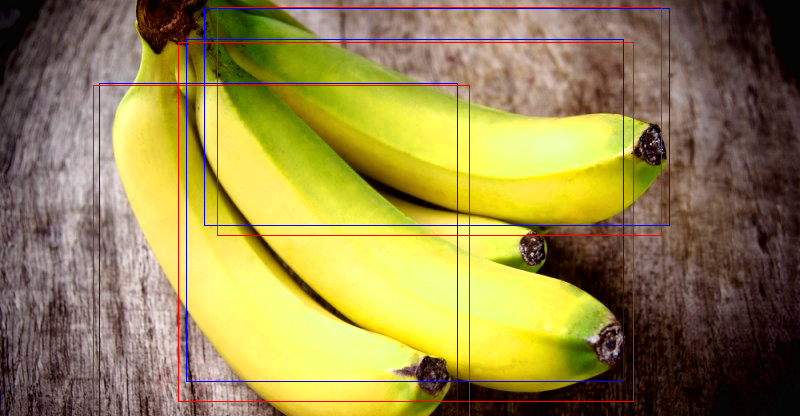

In [ ]:
#@title Ввести индекс и получить картинку
#@markdown Видно, что Albumentations далеко не идеально пересчитывает
#@markdown коробки, да и сама разметка в датасете оставляет желать лучшего
index = 101 #@param {type:"slider", min:0, max:240, step:1}

from PIL import ImageDraw

def draw_image(idx, images, labels):
    model.to(device).eval()
    pred = model(images[idx].unsqueeze(0).to(device))[0]

    image = torchvision.transforms.ToPILImage()(images[idx])
    draw = ImageDraw.Draw(image)
    for box in labels[idx]['boxes']:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue')
        
    for box in pred['boxes']:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
    return image

draw_image(index, images, labels)

In [ ]:
# Уберем бесячие ошибки
import warnings
warnings.filterwarnings('ignore')

# Тренируемся (￣o￣).zZ
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

Validation:
AUC ON TEST: 0.8406
Epoch: 16


KeyboardInterrupt: ignored

В общем, не знаю, как больше 0,86 выбить. Аугументации и так и сяк пробовал, около 100 эпох тренировал с разными параметрами аугументаций и lr.

__Выведите итоговое качество модели__.

In [ ]:
auc_score = evaluate(model, val_dataloader, device)
print(auc_score)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc_score / 0.91)))

0.8459965739146279
Оценка за это задание составит 3.7186662589653974 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [ ]:
# Соберем все изображения и лейблы из тестового сета
images = []
labels = []
for img, lab in val_dataset:
    images.append(img)
    labels.append(lab)

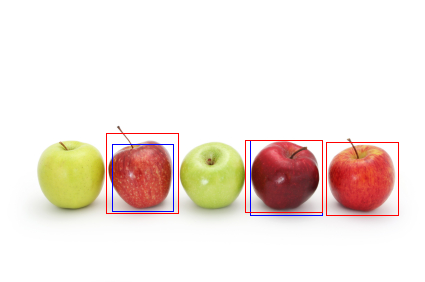

In [ ]:
#@title Смотрим на предсказания
#@markdown А чем яблоко справа провинилось, что его не разметили(
index = 44 #@param {type:"slider", min:0, max:60, step:1}
draw_image(index, images, labels)

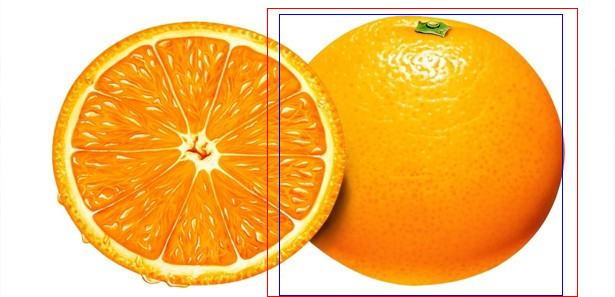

In [ ]:
#@title Любуемся
index = 27 #@param {type:"slider", min:0, max:60, step:1}
draw_image(index, images, labels)

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

### Попробуем увеличить модель и добавить аугументаций

In [11]:
class BiggerModel(nn.Module):
    def __init__(self):
        super(BiggerModel, self).__init__()

        def block(in_channels, out_channels, downsample=True):
            layers = [nn.Conv2d(in_channels, out_channels, [3, 3], stride=1, padding=[1, 1])]
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            layers.append(nn.Conv2d(out_channels, out_channels, [3, 3], stride=1, padding=[1, 1]))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            if downsample:
                layers.append(nn.AvgPool2d(2, 2))
            return layers

        # Блочная модель побольше
        self.model = nn.Sequential(
            *block(3, 64), # output shape (None, 64, 32, 32)
            *block(64, 128), # output shape (None, 128, 16, 16)
            *block(128, 256), # output shape (None, 256, 8, 8)
            *block(256, 512), # output shape (None, 512, 4, 4)
            *block(512, 1024), # output shape (None, 1024, 2, 2)
            nn.Dropout(0.3),
            *block(1024, 2048), # output shape (None, 2048, 1, 1)
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.Linear(2048*1*1, 2048),
            nn.Dropout(0.2),
            nn.Linear(2048*1*1, 200)
        )

    def forward(self, imgs):
        pred = self.model(imgs)
        return pred

model = BiggerModel()

In [19]:
#@title Статистики
#@markdown Люблю формы в колабе
images = []
for img, lab in train_dataloader:
    images.append(img)

images = torch.cat(images)
print('mean for each channel:', torch.mean(torch.mean(images, dim=(2, 3)), dim=0))
print('std for each channel:', torch.std(torch.mean(images, dim=(2, 3)), dim=0))

mean for each channel: tensor([0.4346, 0.4035, 0.3578])
std for each channel: tensor([0.1321, 0.1251, 0.1427])


In [12]:
# YOUR CODE
# Подключим аугументации
train_transform = Compose([
    torchvision.transforms.RandomHorizontalFlip(), # С вероятностью 0.5 отражаем по горизонтали
    torchvision.transforms.RandomRotation(25, resample=PIL.Image.BILINEAR), # Случайный поворот до 25 градусов
    # torchvision.transforms.RandomCrop((60,60)), # Случайным образом выбираем область 60x60
    torchvision.transforms.Resize((64,64)), # Обратно масштабируем в разрешение 64x64
    torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, hue=0.05, saturation=0.1), # Слегка меняем цвет изображения
    torchvision.transforms.ToTensor(), # Превращаем в тенсор
    Normalize((0.4346, 0.4035, 0.3578), (0.1321, 0.1251, 0.1427)), # Нормализуем каждый канал нашими статистиками
])
val_transform = Compose([
                         Resize((64, 64)),
                         ToTensor(),
                         Normalize((0.4346, 0.4035, 0.3578), (0.1321, 0.1251, 0.1427)),
                         ])

train_dataset = MyDataset("./dataset/dataset/train", transform=train_transform)
val_dataset = MyDataset("./dataset/dataset/val", transform=val_transform)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
train_dataloader = DataLoader(
                              train_dataset, batch_size=64, shuffle=True, num_workers=4
                              ) 
val_dataloader = DataLoader(
                            val_dataset, batch_size=64, num_workers=4
                            ) 
# criterion = nn.CrossEntropyLoss()
# scheduler = None 
n_epochs = 100

In [ ]:
# Файн тюнинг
model.model._modules['43'] = nn.Conv2d(256, 512, kernel_size=[3, 3], stride=(1, 1), padding=[1, 1])
model.model._modules['44'] = nn.BatchNorm2d(512)
model.model._modules['49'] = nn.Linear(512, 200)
model.model

# Загрузка чекпойнта
checkpoint = torch.load('model_1.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model.eval()

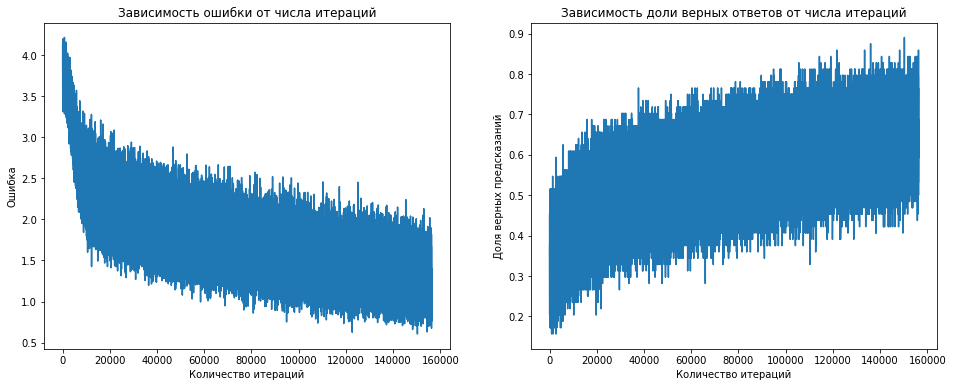

Validation



Validation accuracy: 0.4832


In [ ]:
# Пообучаем нашу модель еще 100 эпох
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

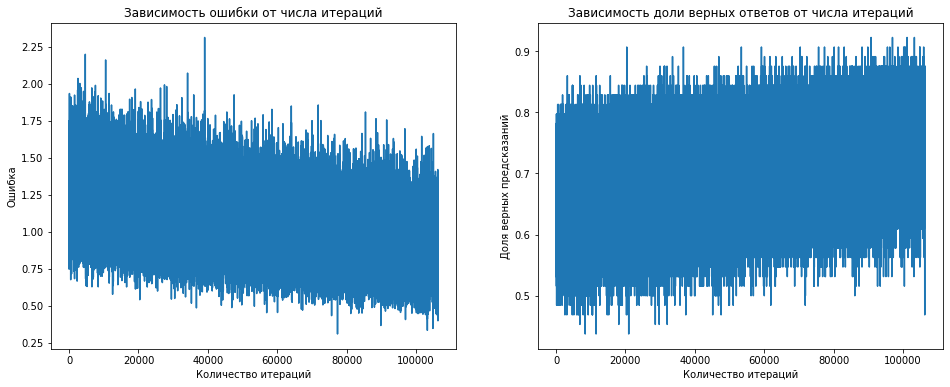

Validation



Validation accuracy: 0.4929
Epoch: 68


In [ ]:
# Пообучаем нашу модель еще 100 эпох
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

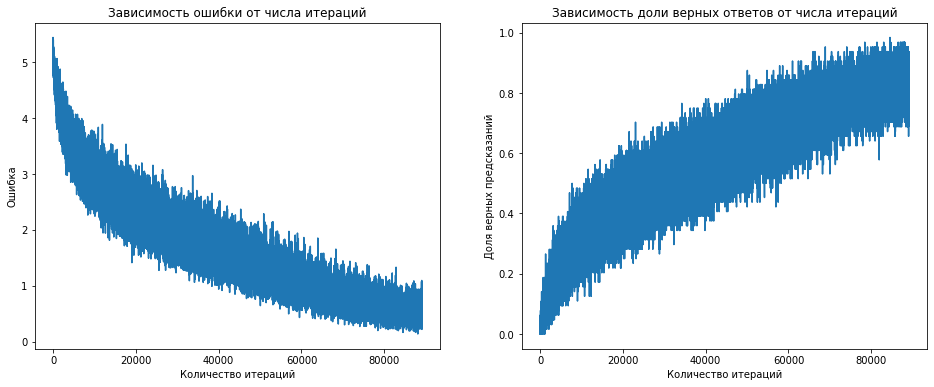

Validation



Validation accuracy: 0.4865
Epoch: 57


KeyboardInterrupt: ignored

In [21]:
# BiggerModel
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

In [22]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)


0.4888


In [24]:
# Посмотрим на каких классах чаще происходят ошибки
losses, predicted_classes, true_classes = predict(model, val_dataloader, criterion)
mask = predicted_classes == true_classes
errors_pred = predicted_classes[~mask]
errors_true = true_classes[~mask]
unique, counts = np.unique(errors_true, return_counts=True)
error_dict = {}
for i in range(len(unique)):
    error_dict[unique[i]] = counts[i]
print(error_dict)

{0: 11,
 1: 16,
 2: 12,
 3: 38,
 4: 33,
 5: 26,
 6: 27,
 7: 17,
 8: 29,
 9: 21,
 10: 30,
 11: 38,
 12: 22,
 13: 23,
 14: 30,
 15: 26,
 16: 14,
 17: 22,
 18: 11,
 19: 14,
 20: 24,
 21: 28,
 22: 24,
 23: 30,
 24: 19,
 25: 36,
 26: 13,
 27: 28,
 28: 5,
 29: 35,
 30: 21,
 31: 24,
 32: 24,
 33: 40,
 34: 29,
 35: 29,
 36: 17,
 37: 34,
 38: 31,
 39: 43,
 40: 26,
 41: 22,
 42: 31,
 43: 18,
 44: 34,
 45: 8,
 46: 14,
 47: 30,
 48: 32,
 49: 22,
 50: 22,
 51: 22,
 52: 23,
 53: 17,
 54: 31,
 55: 13,
 56: 43,
 57: 28,
 58: 30,
 59: 20,
 60: 18,
 61: 18,
 62: 23,
 63: 17,
 64: 26,
 65: 18,
 66: 38,
 67: 34,
 68: 31,
 69: 16,
 70: 15,
 71: 25,
 72: 32,
 73: 32,
 74: 38,
 75: 17,
 76: 23,
 77: 11,
 78: 28,
 79: 25,
 80: 9,
 81: 33,
 82: 26,
 83: 17,
 84: 24,
 85: 23,
 86: 29,
 87: 21,
 88: 7,
 89: 31,
 90: 14,
 91: 32,
 92: 30,
 93: 34,
 94: 27,
 95: 24,
 96: 30,
 97: 22,
 98: 23,
 99: 34,
 100: 31,
 101: 28,
 102: 12,
 103: 21,
 104: 27,
 105: 24,
 106: 28,
 107: 24,
 108: 31,
 109: 34,
 110: 30,
 111

In [31]:
# Будем больше штрафовать модель на объектах, на которых больше ошибаемся
weights = torch.Tensor(counts / len(errors_pred)).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

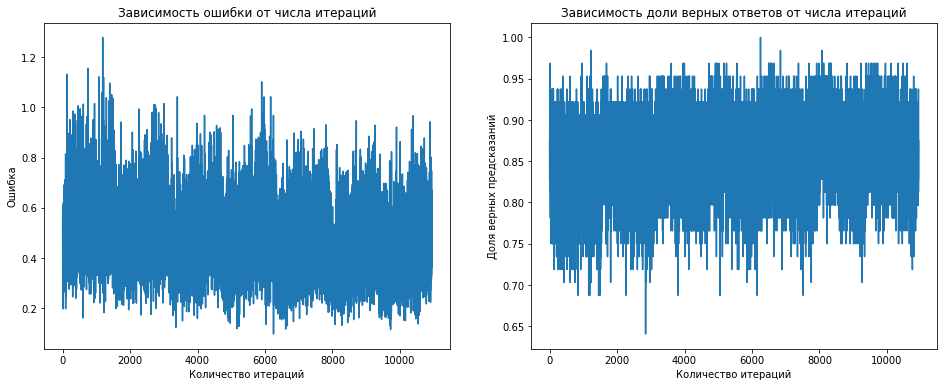

Validation



Validation accuracy: 0.4837
Epoch: 7


KeyboardInterrupt: ignored

In [32]:
# BiggerModel
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

Больше 49.5% правильных ответов добиться не удалось...

### ResNet
Будем дообучать

In [20]:
# YOUR CODE
# Подключим аугументации
train_transform = Compose([
    torchvision.transforms.RandomHorizontalFlip(), # С вероятностью 0.5 отражаем по горизонтали
    torchvision.transforms.RandomRotation(25, resample=PIL.Image.BILINEAR), # Случайный поворот до 25 градусов
    # torchvision.transforms.RandomCrop((60,60)), # Случайным образом выбираем область 60x60
    torchvision.transforms.Resize((64,64)), # Обратно масштабируем в разрешение 64x64
    torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, hue=0.05, saturation=0.1), # Слегка меняем цвет изображения
    torchvision.transforms.ToTensor(), # Превращаем в тенсор
    Normalize((0.4346, 0.4035, 0.3578), (0.1321, 0.1251, 0.1427)), # Нормализуем каждый канал нашими статистиками
])
val_transform = Compose([
                         Resize((64, 64)),
                         ToTensor(),
                         Normalize((0.4346, 0.4035, 0.3578), (0.1321, 0.1251, 0.1427)),
                         ])

train_dataset = MyDataset("./dataset/dataset/train", transform=train_transform)
val_dataset = MyDataset("./dataset/dataset/val", transform=val_transform)

train_dataloader = DataLoader(
                              train_dataset, batch_size=64, shuffle=True, num_workers=4
                              ) 
val_dataloader = DataLoader(
                            val_dataset, batch_size=64, num_workers=4
                            ) 
# criterion = nn.CrossEntropyLoss()
# scheduler = None 
n_epochs = 100

In [21]:
from torchvision.models import resnet18
resnet = resnet18(pretrained=True)
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [22]:
resnet.fc = nn.Linear(512, 200)
params = [param for param in resnet.parameters() if param.requires_grad]
criterion = nn.CrossEntropyLoss()

In [26]:
optimizer = torch.optim.Adam(params, lr = 0.00001) # torch.optim.SGD(params, lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = None # torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

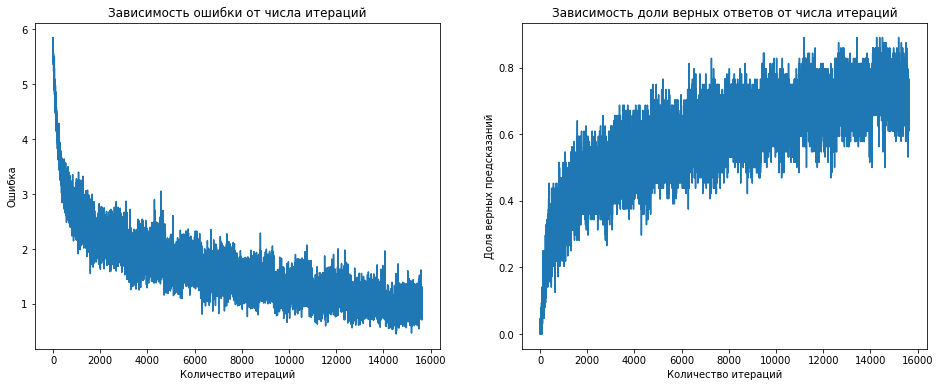

Validation



Validation accuracy: 0.5008
Epoch: 10


KeyboardInterrupt: ignored

In [25]:
# ResNet
train(resnet, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

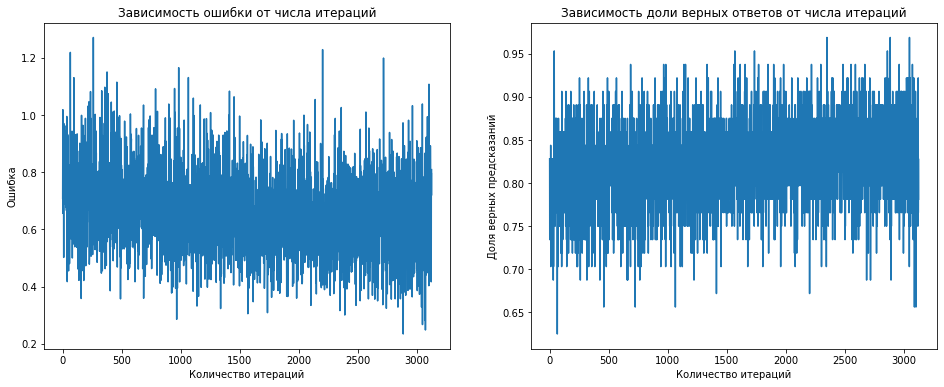

Validation



Validation accuracy: 0.5343
Epoch: 2


KeyboardInterrupt: ignored

In [28]:
# ResNet Поставил lr поменьше
train(resnet, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

In [30]:
all_losses, predicted_labels, true_labels = predict(resnet, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)


0.5369


53.69% accuracy за 12 эпох

Вывод: предобученные модели круче моих...

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

![Картинка](https://sun9-8.userapi.com/ZH2hwZidDuM_8jvfyEgEtNQnGdA2SShtZNMNuw/SIRI2w2dL4M.jpg)

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.

Спасибо за то, что самый сложный код в распознавании объектов уже написан 😍😍!

Спасибо за подробные инструкции и подсказки!